# The Law of Large Numbers

The Law of Large Numbers, also known as Bernoulli's Theorem, is a fundamental concept in probability theory. It states that, for a large or infinite number of independent identically distributed (i.i.d.) random variables, the sample mean will converge towards the expected value of the variables. In other words, as the number of random variables increases, the probability of the sample mean deviating significantly from the population mean decreases.

Mathematically, the Law of Large Numbers can be expressed as follows:

If $X1, X2, ..., Xn$ are i.i.d. random variables with expected value $E(Xi) = μ$ and variance $Var(Xi) = σ^2$, then for any $ε > 0$ :



$$P(\left\vert\dfrac{(X_1 + X_2 + \dots + X_n)}{n} - \mu\right\vert \geq \epsilon) \rightarrow 0$$ as $n \rightarrow \infty$.


In simpler terms, the sample average of a large number of i.i.d. random variables will become increasingly close to the expected value as the number of observations increases, making the sample mean a reliable estimate of the population mean.

The Law of Large Numbers has significant implications in various fields such as finance, statistics, economics, and insurance. In finance, for example, it is used to estimate the expected returns of an investment portfolio. In statistics, it is used to validate the accuracy of statistical models and verify that the sample data is representative of the population. In economics and insurance, it is used to estimate the risk associated with certain investments and the likelihood of specific events occurring.



## Application In Real Life

A real-life example of the Law of Large Numbers can be seen in the insurance industry. Insurance companies use statistical analysis to determine the likelihood of certain events, such as car accidents, home damage, or health issues. 

Let's take car insurance as an example. Insurance companies collect data on various factors, such as the age, gender, and driving history of policyholders. The company uses this data to calculate the expected losses from car accidents, which allows them to set premium rates that will cover these losses and make a profit. 

The Law of Large Numbers comes into play here because insurance companies cannot predict with 100% accuracy how many car accidents will occur each year or how much damage they will cause. However, by looking at data from a large number of policyholders, the company can reduce the uncertainty and make more accurate predictions.

For example, if the insurance company has data on 100,000 policyholders, they can use the Law of Large Numbers to calculate the expected number of accidents based on the average accident rate for that group. As the number of policyholders increases, the company's confidence in their predictions also increases. This allows them to set premiums that accurately reflect the risk of insuring each individual policyholder.


## Simulation With Python

To simulate the law of large numbers in Python, we will use the random module to generate a sequence of n random numbers that are uniformly distributed between 0 and 1. We will then calculate the arithmetic mean of the first i numbers for each i ≤ n, and plot the results to show how the mean value approaches the expected value as n increases.

First, we will import the necessary libraries and set the seed for the random number generator:


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random

# set the seed for the random number generator for reproducibility
random.seed(42)

Next, we will define a function to simulate the law of large numbers given a sample size n and a number of iterations m:


In [11]:
# Define a function to simulate the law of large numbers given a sample size n and a number of iterations m:
def lln_simulation(n, m):
  # Initialize an empty list to store the means
  means = []
  # Loop over each sample size i from 1 to n
  for i in range(1, n+1):
    # Generate m samples of size i from a uniform distribution between 0 and 1
    sample = [random.uniform(0,1) for j in range(i*m)]
    # Calculate the mean of each sample and append it to the means list
    means.append(np.mean(sample))
  # Return the list of means
  return means


This function generates m samples of size i for each i from 1 to n, and returns a list of the means of each sample.

To visualize the results, we will plot the means against the sample size i, and compare them to the expected value of 0.5. We will also plot two horizontal lines at 0.5 ± 0.1 to show the 90% confidence interval.


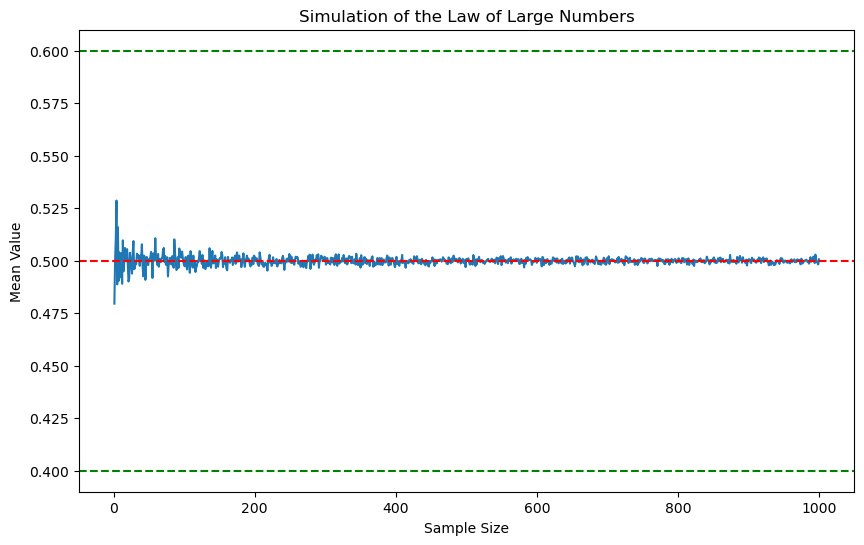

In [13]:
# Set the sample size (n) and number of iterations (m)
n = 1000
m = 100

# Call the lln_simulation function to generate the means
means = lln_simulation(n, m)

# Plot the means against the sample size i
plt.figure(figsize=(10,6))
plt.plot(range(1, n+1), means)

# Add a horizontal red dashed line at the expected value of 0.5
plt.axhline(y=0.5, color='r', linestyle='--')

# Add two horizontal green dashed lines at 0.4 and 0.6 to show the 90% confidence interval
plt.axhline(y=0.4, color='g', linestyle='--')
plt.axhline(y=0.6, color='g', linestyle='--')

# Add labels and title
plt.title('Simulation of the Law of Large Numbers')
plt.xlabel('Sample Size')
plt.ylabel('Mean Value')

# Show the plot
plt.show()


## Interpretation

The plot shows that as the sample size increases, the mean value of the samples approaches the expected value of 0.5. At the same time, the variance of the means decreases, since the law of large numbers guarantees that the sample mean will converge to the true mean as the sample size grows. The horizontal lines show the 90% confidence interval for the mean, which becomes narrower as the sample size increases.

## In Machine Learning

In machine learning, we often use random sampling to train our models using a subset of the available data (i.e., a training set) and then evaluate their performance on another subset of the data (i.e., a test set).

The law of large numbers guarantees that as the sample size grows, the estimate of the mean will get closer and closer to the true mean of the population. In machine learning, this means that as we increase the size of the training set, our model's performance on the test set will converge to its optimal performance.

This is particularly important for building robust models that generalize well to new or unseen data. By ensuring that our training and test sets are representative of the population of interest, and that our training set is sufficiently large, we can reduce the risk of overfitting and improve the performance of our model on unseen data.

Here is an example code to illustrate the use of the law of large numbers in machine learning:

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [32]:
# Load the digits dataset
digits = load_digits()

# Split the data into training and test sets using a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Initialize a logistic regression model with a maximum of 1000 iterations and a random seed of 42
model = LogisticRegression(max_iter=2000, solver='saga', random_state=42)

In [33]:
# Initialize a list to store the test set accuracy for different training set sizes
test_accuracies = []

# Loop over different training set sizes, starting with 100 and increasing by 100 until the entire training set is used
for train_size in range(100, len(X_train), 100):
    # Train the logistic regression model on a subset of the training data
    model.fit(X_train[:train_size], y_train[:train_size])
    # Calculate the test set accuracy of the model on the entire test set
    test_acc = model.score(X_test, y_test)
    # Append the test accuracy to the list for the current training set size
    test_accuracies.append(test_acc)

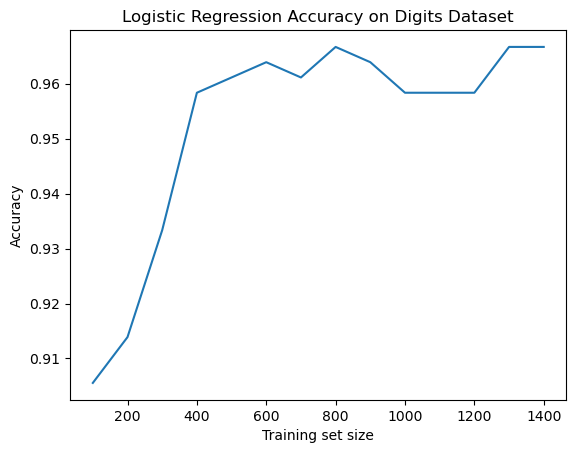

In [35]:
# Plot the test set accuracy against the training set size
plt.plot(range(100, len(X_train), 100), test_accuracies)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy on Digits Dataset')
plt.show()
